In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers


In [6]:
from tensorflow.keras.models import load_model


In [7]:

IMAGE_SIZE=256
BATCH_SIZE=32

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [1]:
class_name=dataset.class_names
class_name

NameError: name 'dataset' is not defined

In [10]:
def get_dataset_partitions(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle = True , shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds.shuffle(shuffle_size,seed=12)
    #sizes
    train_size = int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    #datasets
    train_ds=dataset.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds , test_ds


In [11]:
train_ds,val_ds,test_ds = get_dataset_partitions(dataset)

In [12]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
model=load_model('models/potatoModel/potatoModel.h5')

In [14]:
model

In [15]:
# model.evaluate(test_ds)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

actual_label: Potato___Late_blight
predicted class = Potato___Late_blight


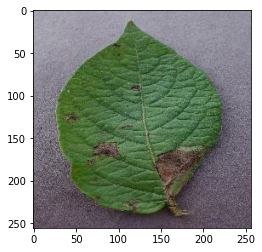

In [17]:
for images_batch , labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy()
    first_label= labels_batch[0]
    print('actual_label:' , class_name[first_label] )
    plt.imshow(first_image.astype('uint8'))

    batch_prediction = model.predict(images_batch)
    print("predicted class =",class_name[np.argmax(batch_prediction[0])])

In [29]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = np.expand_dims(img_array)

    predictions = model.predict(img_array)
    predicted_class= class_name[np.argmax(predictions[0])]
    confidence=round(100*np.max(predictions[0]), 2)
    return  predicted_class,confidence

AttributeError: module 'numpy' has no attribute 'expend_dims'

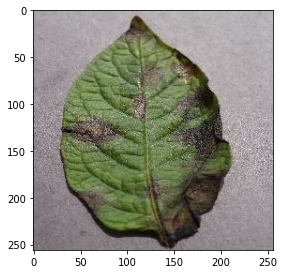

In [30]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]
        plt.title(f"actual label:{actual_class} \n predicted class : {predicted_class}")
        plt.axis('off')